# **🔗 Objetivos**

Esse notebook tem como objetivo a avaliação para o processo seletivo de **Instutor de Mentoria** na **Resilia Educação**.

Tendo em vista o escopo da vaga, os processos realizados nos dados serão acompanhados de dicas, instruções do que está

sendo realizado.

# <b style="color:#f87730"> 🧰 Importando bibliotecas e o DataFrame. </b>

Como boa prática no nosso código, devemos começar importando as bibliotecas que serão utilizadas 

ao longo do código. Enquanto trabalhamos no projeto, podemos sentir a necessidade de "chamar" outras bibliotecas.

Se for o caso, devemos voltar aqui e adicioná-las abaixo, para que o fluxo de código se mantenha limpo e organizado,

e para uma fácil identificação das ferramentas utilizadas. 

In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Após isso, vamos ler o(s) conjunto(s) de dados que será utilizado, a partir da função **READ** do pandas.

O read conta com algumas variantes, a depender do tipo de arquivo lido. 

Neste caso, **read_csv** pois nossos arquivos estão no formato .csv.

In [2]:
# Ao rodar o código sem parâmetros (como o encoding), iremos nos deparar com um erro de decodificação de um caráctere.
# Pesquisando, podemos encontrar sua causa (caso não fosse conhecida) e sua solução.
# Nesse caso, apenas trocar o encoding nos dará o resultado desejado, e conseguiremos ler o arquivo:

data = pd.read_csv('Data/forest_fires.csv', encoding='latin-1')

Definindo o estilo visual padrão dos gráficos:

In [3]:
plt.style.use('seaborn')
plt.style.use('seaborn-bright')

# 🌎 **Visão geral e Tratamento dos dados iniciais**

## 🔷 Início

Nosso **DataFrame (DF)** tem poucas colunas, e fazendo sua chamada conseguimos visualizá-las:

In [4]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


Caso não fosse o caso, poderíamos ver todas a partir da propriedade **COLUMNS**:

In [5]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

O shape nos retorna uma **TUPLA** com o número de linhas e colunas do nosso DF:

In [6]:
data.shape

(6454, 5)

## 🔷 Tipos

Outra propriedade importante, a **DTYPES**, nos permite ver os nomes das colunas e os tipos de dados que elas armazenam.

É de extrema importância saber qual o tipo em que estão armazenados os nossos dados, para pensarmos na melhor

solução para os problemas que envolverão essas entradas em questões como **performance** e **tratamento dos dados**.

In [7]:
data.dtypes

year        int64
state      object
month      object
number    float64
date       object
dtype: object

Um exemplo claro disso é a coluna **date**, que atualmente está como object (string). Caso fosse utilizar essa coluna,

 ela seria mantida como **TIMESTAMP/DATETIME**, sendo transformada utilizando a função (to_datetime):

In [8]:
data['date'] = pd.to_datetime(data.date)
data['date'].head(5)


0   1998-01-01
1   1999-01-01
2   2000-01-01
3   2001-01-01
4   2002-01-01
Name: date, dtype: datetime64[ns]

Porém, se olharmos com um pouco mais de cuidado para essa coluna, vamos perceber sua redundância:

todos os meses nessa coluna estão como 01, inutilizando o seu propósito. Os dados podem ter sido

compilados de forma errada antes de serem enviados para o Kaggle ou para a própria fonte primária

de dados, que não está mais disponível de forma oficial.

In [9]:
data.date.dt.month.value_counts()

1    6454
Name: date, dtype: int64

Com isso, opto por remover esta coluna do nosso DF, já que suas informações já existem nas colunas "year" e "month":

> ❗ ATENÇÃO
>
>   Para a alteração ser atribuída e não apenas visualizada, devemos atribuir a operação (drop) a uma variável,
>
>   neste caso, o próprio DF. Pode ser feito como na atribuição abaixo, ou usando o parâmetro **INPLACE**, que apesar de funcionar,
>
>   é atualmente uma prática desencorajada pela própria documentação do Pandas.

In [10]:
data = data.drop("date", axis=1)

Continuando a troca dos tipos de dados, percebemos que a coluna "number" está no formato **FLOAT**, que serve para números decimais.

Porém, podemos passar essa coluna para **INT**, já que esperamos apenas valores inteiros (não existe "um incêndio e meio").

In [11]:
data.number = data.number.astype('int64')

# Visualizando a alteração:

data.dtypes

year       int64
state     object
month     object
number     int64
dtype: object

____

## 🔷 Duplicados

Agora, verificaremos se existem **dados duplicados**. Na linha de código abaixo,

selecionamos dentro do conjunto de dados aqueles dados que são duplicados,

e com o parâmetro Keep setado p/ False, podemos ter uma visão de todas entradas repetidas.

> ❗ Atenção
>
> O keep=False servirá apenas p/ a visualização, devemos lembrar de retirar o parâmetro
>
> ao realizar a remoção dos duplicados, caso contrário nenhum dos N registros repetidos
>
> permanecerá nos nossos dados.

In [12]:
data[data.duplicated(keep=False)]

,year,state,month,number
258,2017,Alagoas,Janeiro,38
259,2017,Alagoas,Janeiro,38
2391,1998,Mato Grosso,Janeiro,0
2411,1998,Mato Grosso,Fevereiro,0
2431,1998,Mato Grosso,Março,0
...,...,...,...,...
4841,1998,Rio,Abril,0
4861,1998,Rio,Maio,0
4864,2001,Rio,Maio,4
4910,2007,Rio,Julho,7


Ao trabalhar com esse conjunto de dados, notei uma grande quantidade de dados repetida. Por enquanto vamos apenas visualizar esses dados.

Explico mais abaixo (na seção **Anomalias nos Dados**) as causas e o que será feito para contornar a situação. 


In [13]:
# Separando por estados podemos ver claramente uma grande quantidade de dados que se repetem

data[data.duplicated(keep=False)].query('state == "Mato Grosso"')

,year,state,month,number
2391,1998,Mato Grosso,Janeiro,0
2411,1998,Mato Grosso,Fevereiro,0
2431,1998,Mato Grosso,Março,0
2451,1998,Mato Grosso,Abril,0
2471,1998,Mato Grosso,Maio,0
2630,1998,Mato Grosso,Janeiro,0
2650,1998,Mato Grosso,Fevereiro,0
2670,1998,Mato Grosso,Março,0
2690,1998,Mato Grosso,Abril,0
2710,1998,Mato Grosso,Maio,0


________

Outro ponto importante que devemos estar atentos são valores nulos e faltantes. Podemos determinar a sua quantidade da seguinte maneira:

Usamos o método .isnull(), que determinará uma variável booleana ao registro (False se o registro estiver preenchido, True caso esteja faltando)

Após isso, usamos outro método, o .sum() para realizar a contagem geral do total de registros faltantes. Caso exista algum registro faltante devemos observar

um número diferente de 0, e tomar as devidas providências para que nossas análises não sejam contaminadas ou atrapalhadas por ele.

In [14]:
# No conjunto de dados trabalhado, observamos que todos os valores existem e não há registros nulos, logo não será necessário nenhuma alteração aqui:

data.isnull().sum()

year      0
state     0
month     0
number    0
dtype: int64

________

## 🔠 Corrigindo erros ortográficos

Aqui, identifico quais os estados estão com nomes reduzidos ou incorretos para facilitar a identificação dos mesmos pelo PBI.

Em seguida, crio um **Dicionário** contendo como chave os nomes incorretos e como valor os nomes certos.

In [15]:
data.state.unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [16]:
corrigidos = {'Amapa':'Amapá', 'Ceara':'Ceará', 'Espirito Santo':'Espírito Santo',
'Goias':'Goiás', 'Maranhao':'Maranhão', 'Paraiba':'Paraíba', 'Piau':'Piauí',
'Rio':'Rio de Janeiro', 'Rondonia':'Rondônia', 'Sao Paulo':'São Paulo'}

Após realizar esse trabalho manual, utilizo o método **REPLACE** do Pandas para substituir as chaves pelos valores corretos.

In [17]:
data = data.replace(corrigidos.keys(), corrigidos.values())

In [18]:
# Com isso, chamamos novamente o UNIQUE para ver se os dados foram substituídos corretamente.

data.state.unique()

array(['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará',
       'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraíba', 'Pernambuco',
       'Piauí', 'Rio de Janeiro', 'Rondônia', 'Roraima', 'Santa Catarina',
       'São Paulo', 'Sergipe', 'Tocantins'], dtype=object)

É importante atentar-se à falta de alguns estados no conjunto de dados. São eles:

> _Rio Grande do Norte; Rio Grande do Sul; Paraná e Mato Grosso do Sul._

Falaremos sobre isso na seção adiante

______

# 📣 <b style="color:red">ANOMALIAS NOS DADOS</a>

## ➿ Contexto

Ao separar os dados por estados verificamos a seguinte situação:

Os estados de Mato Grosso e Paraíba contam com 2x o número de registros normal, e Rio conta com 3x este número.

In [19]:
data.groupby('state').count()

,year,month,number
state,,,
Acre,239,239,239
Alagoas,240,240,240
Amapá,239,239,239
Amazonas,239,239,239
Bahia,239,239,239
Ceará,239,239,239
Distrito Federal,239,239,239
Espírito Santo,239,239,239
Goiás,239,239,239


Os dados fornecidos para cumprir o documento foram fornecidos através do Kaggle, compilados e enviados por um usuário contém algumas inconsistências.

Como visto acima, existem estados faltantes: _Rio Grande do Norte, Rio Grande do Sul, Paraná, Mato Grosso do Sul_. Muito provavelmente houve um erro

ao parsear e separar os dados, transformando-os em um dataset:

<li>"Rio" -> Rio de Janeiro, Rio Grande do Norte e Rio Grande do Sul</li>
<li>"Paraíba" -> Paraíba e Paraná</li>
<li>"Mato Grosso" -> Mato Grosso e Mato Grosso do Sul</li>

Os estados acima estão com informações **UNIDAS**. Em todos os casos, creio que o REGEX estava configurado de maneira incorreta:

<li>apenas para "Rio" e acabou apagando o restante do nome do estado.</li>
<li>possivelmente o "á" no final do nome Paraná fez com que o nome do estado acabasse sendo totalmente apagado,

e posteriormente preenchido como "Paraíba" através do método fillna(), já que estão sequencialmente posicionados.</li>
<li>semelhante ao "Rio", o REGEX desconsiderou parte da string</li>


## 🧨 **Implicações**:

Desta forma, os dados fornecidos estão **CRITICAMENTE** comprometidos, de forma que não é possível determinar com exatidão as informações dos seus

locais originais. Caso continue a utilizá-los, estados estarão com **anomalias** em seus números, e gráficos no PBI ficarão vazios.

## **⭐ Fonte Primária**

No Kaggle disponibilizado para o desafio podemos encontrar a fonte primária de onde o autor retirou os dados:

  > https://dados.gov.br/dataset/sistema-nacional-de-informacoes-florestais-snif

  A página entretanto está fora do ar, com o código de erro 404, citando que a página pode não existir mais. E de fato ela foi desativada em 2021.
  
  Porém isso não vai impedir nosso acesso a esses dados. Utilizando a ferramenta "Wayback Machine" conseguimos ver instâncias do site salvas em momentos do passado.

  Nem todas as "capturas" do site são 100% funcionais, podendo encontrar algumas mais detalhadas e outras com apenas a frações do conjunto do site.

  Buscando um pouco percebemos que em 2018 houve um grande movimento de preservação de capturas do site, de forma que encontramos versões totalmente funcionais,

  onde até os links de download funcionam, apesar do mirror original não existir mais. Com isso, conseguimos chegar à seguinte captura da página:

  > https://web.archive.org/web/20181223043304/http://dados.gov.br/dataset/sistema-nacional-de-informacoes-florestais-snif/resource/949310f1-05bc-4f56-a63f-aef67aac6164

Através dela, podemos baixar o conjunto de dados original:

In [20]:
# Abrindo o csv com parâmtros para o separador, que não é "," usando a engine do python para Parsear o doc,
# e forçando o tipo das colunas como str para remover o "." dos milhares sem que os dados se percam.

dados_originais = pd.read_csv('Data/rf_incendiosflorestais_focoscalor_estados_1998-2017.csv', encoding='latin-1', sep=r'\t', engine='python', dtype=str)
dados_originais = dados_originais.replace('\"', '', regex=True)
dados_originais

,"""Ano",Estado,Mês,Número,"Período"""
0,1998,Acre,Janeiro,0,01/01/1998
1,1999,Acre,Janeiro,0,01/01/1999
2,2000,Acre,Janeiro,0,01/01/2000
3,2001,Acre,Janeiro,0,01/01/2001
4,2002,Acre,Janeiro,0,01/01/2002
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128,01/01/2012
6450,2013,Tocantins,Dezembro,85,01/01/2013
6451,2014,Tocantins,Dezembro,223,01/01/2014
6452,2015,Tocantins,Dezembro,373,01/01/2015


In [21]:
dados_originais.dtypes

"Ano        object
Estado      object
Mês         object
Número      object
Período"    object
dtype: object

_______

# <b style='color:green'>**♻**</b> **Limpeza e criação de novas colunas**

Agora que temos o dataset original de sua fonte primária, percebemos que ele tem uma formatação muito mais concisa.

Não é necessário trocar os nomes dos estados, pois estão todos corretos. Além disso, temos as 27 unidades da federação

brasileira, onde antes só tínhamos 23.

In [22]:
print(len(dados_originais.Estado.unique()))

dados_originais.Estado.unique()

27


array(['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará',
       'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Pará',
       'Paraíba', 'Paraná', 'Pernambuco', 'Piauí', 'Rio de Janeiro',
       'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondônia', 'Roraima',
       'Santa Catarina', 'São Paulo', 'Sergipe', 'Tocantins'],
      dtype=object)

In [23]:
dados_originais.head()

,"""Ano",Estado,Mês,Número,"Período"""
0,1998,Acre,Janeiro,0,01/01/1998
1,1999,Acre,Janeiro,0,01/01/1999
2,2000,Acre,Janeiro,0,01/01/2000
3,2001,Acre,Janeiro,0,01/01/2001
4,2002,Acre,Janeiro,0,01/01/2002


Mesmo nos dados originais, o Período continua sempre tendo como mês '01', então novamente iremos remover a coluna:

In [24]:
dados_originais = dados_originais.drop('Período"', axis=1)

Agora, substituo o nome das colunas que serão utilizadas, a fim de remover as acentuações que podem atrapalhar as buscas:

In [25]:
novas_colunas = {'"Ano':'Ano','Mês':'Mes', 'Número':'Numero'}

dados_originais = dados_originais.rename(columns=novas_colunas)
dados_originais.head()

,Ano,Estado,Mes,Numero
0,1998,Acre,Janeiro,0
1,1999,Acre,Janeiro,0
2,2000,Acre,Janeiro,0
3,2001,Acre,Janeiro,0
4,2002,Acre,Janeiro,0


Agora, nossa tarefa é REMOVER o . dos milhares da coluna de Números para transformá-la em int,

pois se a definirmos como numérica neste momento, ela erroneamente transformará em floats.

In [26]:
dados_originais['Numero'] = dados_originais.Numero.apply(lambda x: x.replace('.', ''))

In [27]:
dados_originais.Numero = pd.to_numeric(dados_originais.Numero)

O mesmo para o Ano:

In [28]:
dados_originais.Ano = pd.to_numeric(dados_originais.Ano)

In [29]:
# Agora temos o DF com os tipos de dados corretos, limpo e com todos os nomes corretos

dados_originais.dtypes

Ano        int64
Estado    object
Mes       object
Numero     int64
dtype: object

Por último, verificando os valores vemos que quase todos os estados tem 239 registros, menos Alagoas:

In [30]:
dados_originais.Estado.value_counts()

Alagoas                240
Acre                   239
Paraíba                239
Sergipe                239
São Paulo              239
Santa Catarina         239
Roraima                239
Rondônia               239
Rio Grande do Sul      239
Rio Grande do Norte    239
Rio de Janeiro         239
Piauí                  239
Pernambuco             239
Paraná                 239
Pará                   239
Minas Gerais           239
Mato Grosso do Sul     239
Mato Grosso            239
Maranhão               239
Goiás                  239
Espírito Santo         239
Distrito Federal       239
Ceará                  239
Bahia                  239
Amazonas               239
Amapá                  239
Tocantins              239
Name: Estado, dtype: int64

Verificando os valores duplicados, encontramos um registro repetido no estado:

In [31]:
dados_originais[dados_originais.duplicated(keep=False)]

,Ano,Estado,Mes,Numero
258,2017,Alagoas,Janeiro,38
259,2017,Alagoas,Janeiro,38


In [32]:
dados_originais = dados_originais.drop_duplicates()

In [33]:
#Podemos verificar que todos os estados (27) possuem 239 registros:

dados_originais.Estado.value_counts().value_counts()

239    27
Name: Estado, dtype: int64

Dessa forma, aqui termina a limpeza dos dados.

__________

## 📅 Criando colunas de trimestres e meses inteiros

Conforme dito acima, a coluna Período não continha informações relevantes, já que somente representava o ano. 

Porém ainda precisamos dos valores numéricos para ordenar os meses. Além disso, também dividirei em trimestres

os meses, para gerar gráficos no Power BI.

In [34]:
dicionario_meses = {'Janeiro':1, 'Fevereiro':2,
                      'Março':3, 'Abril':4,
                      'Maio':5, 'Junho':6,
                      'Julho':7, 'Agosto':8,
                      'Setembro':9, 'Outubro':10,
                      'Novembro':11, 'Dezembro':12}

def nomeMes_Numeral(mes):
  # Transforma o nome do mês em seu correspondente numérico.
  

  return dicionario_meses.get(mes)

In [35]:
def mes_Trimestre(mesNum):
  # Classifica o trimestre de acordo com mês.
  
  # Essa classificação poderia ser feita através de uma função no PBI
  # mas optei por enviar o conjunto de dados totalmente funcional.

  return 'Q1' if 12/mesNum >= 4 else 'Q2' if 12/mesNum >= 2 else 'Q3' if 12/mesNum >=1.33 else 'Q4'

In [36]:
dicionario_regiao = {'Acre':'N', 'Amapá':'N', 'Amazonas':'N', 'Pará':'N', 'Rondônia':'N', 'Roraima':'N', 'Tocantins':'N',
                    'Alagoas':'NE', 'Bahia':'NE', 'Ceará':'NE', 'Maranhão':'NE', 'Paraíba':'NE', 'Pernambuco':'NE', 'Piauí':'NE', 
                    'Rio Grande do Norte':'NE', 'Sergipe':'NE', 'Espírito Santo':'SE', 'Minas Gerais':'SE', 'Rio de Janeiro':'SE',
                    'São Paulo':'SE','Goiás':'CO', 'Mato Grosso':'CO', 'Mato Grosso do Sul':'CO','Distrito Federal':'CO', 
                    'Paraná':'S', 'Santa Catarina':'S', 'Rio Grande do Sul':'S'}

dados_originais['Regiao'] = dados_originais.Estado.apply(lambda x: dicionario_regiao.get(x))

In [37]:
dados_originais['Mes_int'] = dados_originais.Mes.apply(lambda x: nomeMes_Numeral(x))

In [38]:
dados_originais['Trimestre'] = dados_originais.Mes_int.apply(lambda x: mes_Trimestre(x))

In [39]:
dados_originais

,Ano,Estado,Mes,Numero,Regiao,Mes_int,Trimestre
0,1998,Acre,Janeiro,0,N,1,Q1
1,1999,Acre,Janeiro,0,N,1,Q1
2,2000,Acre,Janeiro,0,N,1,Q1
3,2001,Acre,Janeiro,0,N,1,Q1
4,2002,Acre,Janeiro,0,N,1,Q1
...,...,...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128,N,12,Q4
6450,2013,Tocantins,Dezembro,85,N,12,Q4
6451,2014,Tocantins,Dezembro,223,N,12,Q4
6452,2015,Tocantins,Dezembro,373,N,12,Q4


_______

# **🔍 Visualizando os dados limpos**

Agora, com o conjunto de dados original, completo e limpo, vamos realizar algumas visualizações e descrições dos dados,

a começar com o método **DESCRIBE**, para observar algumas das características das colunas numéricas:

In [40]:
dados_originais.describe()

,Ano,Numero,Mes_int
count,6453.000000,6453.000000,6453.000000
mean,2007.460251,567.641717,6.476987
std,5.745872,1648.487298,3.441114
min,1998.000000,0.000000,1.000000
25%,2002.000000,9.000000,3.000000
50%,2007.000000,55.000000,6.000000
75%,2012.000000,284.000000,9.000000
max,2017.000000,25963.000000,12.000000


A partir do describe, podemos ter uma visão das características gerais do DF:

1. Count - **Contagem de registros** (linhas) na coluna;

2. Mean - **Média da coluna**;

3. Std - **Desvio padrão da coluna** (podemos observar por exemplo que no **YEAR** o STD é baixo,

    pois os dados se concentram num período de apenas 19 anos de diferença, enquanto no NUMERO
    
    temos um STD muito mais alto, pois os dados variam entre 0 e 25963 na coluna;

4. Min - **Valor mínimo** encontrado na coluna, menor registro;

5. 25% - **Primeiro Quartil** ou **Q1** (25% dos valores se encontram abaixo daqui);

6. 50% - **Segundo Quartil** ou **Q2** (50% dos valores estão abaixo daqui);

7. 75% - **Terceiro Quartil** ou **Q3** (75% dos valores estão abaixo daqui);

8. Max - **Valor máximo** encontrado na coluna, maior registro.

In [41]:
# Além dos quartis padrão vistos acima, podemos obter os dados que se encontram antes de uma porcentagem X%,
# utilizando o método QUANTILE, e dentro dele passando a porcentagem que desejamos como argumento: nesse caso, 60%

dados_originais.quantile(0.60)

Ano        2009.0
Numero       99.0
Mes_int       8.0
Name: 0.6, dtype: float64

Também podemos gerar gráficos que nos ajudam na visualização da distribuição dos dados, como o **BOXPLOT**.

Nesse caso, podemos ver os três quartis citados acima na **BARRA** do gráfico, sendo sua parte inferior o Q1,

a linha verde o Q2 e sua parte superior o Q3. Além disso, percebemos também uma linha que segue até um valor

que se aproxima de 700. Esses dados são considerados "normais" dentro da distribuição. Os pontos pretos são os **OUTLIERS**,

dados que não estão dentro da distribuição esperada da maioria dos dados. Porém, isso não quer dizer que devemos sempre

eliminar estes dados, ou que eles são um problema. É esperado que em um país com grandes dimensões e peculiaridades

(vegetação, cultura, clima) como o Brasil existam áreas muito mais propensas ao fenômeno, que terão um elevado número de casos.

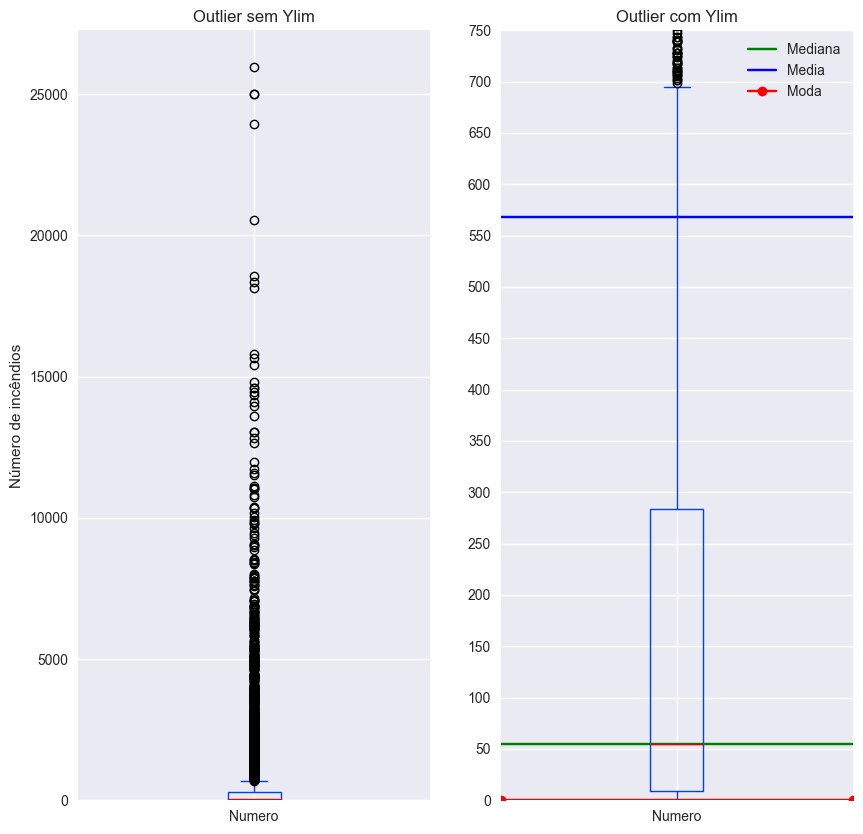

In [42]:
# Nestes dados os outliers (bolinhas pretas) vão até próximas do valor de 700 começam próximas ao valor de 700.
# Para melhor visualização, limito os valores até 750 no gráfico da direita


fig, ax = plt.subplots(1, 2, figsize=(10,10))


dados_originais.Numero.plot(kind='box', ylim=(0), ax=ax[0], ylabel='Número de incêndios', title='Outlier sem Ylim', )


dados_originais.Numero.plot(kind='box',  ylim=(0,750), title='Outlier com Ylim', yticks=[i for i in range(0,751,50)])

plt.axhline(y=dados_originais.Numero.median(), color='green', label='Mediana')
plt.axhline(y=dados_originais.Numero.mean(), color='blue', label='Media')
plt.axhline(y=dados_originais.Numero.mode()[0], color='red', label='Moda', marker='o')

plt.legend()

plt.show()




Outro método para verificarmos essa distribuição dos dados é o **DISTPLOT**, da biblioteca **SEABORN**:

Notamos que ela não é uma Distribuição Padrão (Gaussiana/Bell Shaped), e sim uma distribuição <b style="color:#1c87d9">**RIGHT SKEWED**</b>,

com seus dados se concentrando na parte esquerda que se confirmam com o padrão da **moda** (0), seguido da **mediana** (55) e por último, a **média** (567.64)

[]

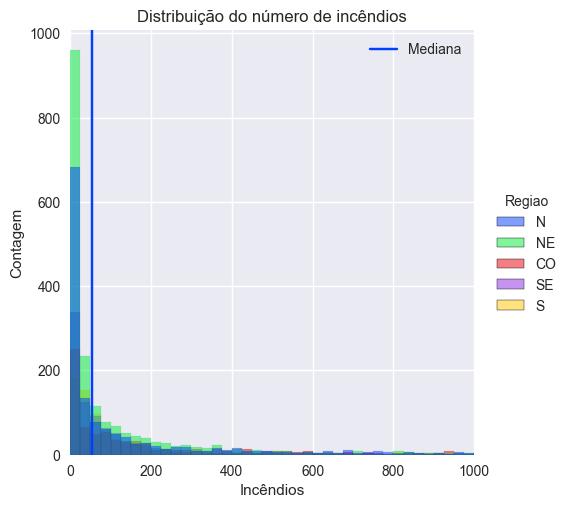

In [43]:
sns.displot(dados_originais, x='Numero', binwidth=25, hue='Regiao')

plt.xlim(0,1000)

plt.ylabel('Contagem')
plt.xlabel('Incêndios')
plt.title('Distribuição do número de incêndios')

plt.axvline(x=dados_originais.Numero.median(), label='Mediana')

plt.legend()
plt.plot()

É necessário limitar o xlim, caso contrário a visualização torna-se minúscula.

Apesar da moda 0, a média acaba sendo alta pelos outliers com grandes números de incêndios.

In [44]:
print(f'Moda: {dados_originais.Numero.mode()[0]};\nMediana: {dados_originais.Numero.median()};\nMédia: {dados_originais.Numero.mean()}')


Moda: 0;
Mediana: 55.0;
Média: 567.6417170308383


____________

# **📊 Plots**

Após realizar a limpeza e visualização da distribuição dos nossos dados, partimos para o plot

de gráficos que nos forneçam mais informações sobre as ocorrências dos incêndios.

## Série número de incêndios por estado

Definindo um colormap para os dados:

In [45]:
cm = sns.color_palette('YlOrRd', as_cmap=True)


In [46]:
incendios_por_estado = dados_originais[['Estado', 'Numero']].groupby(by='Estado').sum().sort_values(by='Numero', ascending=False)
incendios_por_estado.style.background_gradient(cmap=cm)

,Numero
Estado,
Mato Grosso,723629
Pará,638042
Maranhão,405879
Tocantins,248378
Bahia,239777
Rondônia,224510
Piauí,182406
Minas Gerais,181589
Mato Grosso do Sul,119897


___

## Soma total dos incêndios por estado

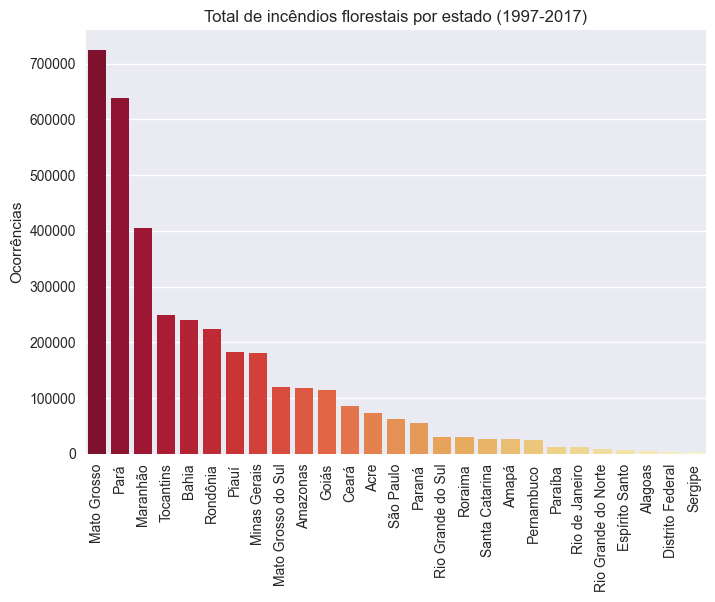

In [47]:
ax = sns.barplot(data=incendios_por_estado, x=incendios_por_estado.index, y='Numero', palette='YlOrRd_r')

plt.xticks(rotation=90)
plt.title('Total de incêndios florestais por estado (1997-2017)')
plt.xlabel('')
plt.ylabel('Ocorrências')

plt.show()

___

## Média de incêndios por estado

In [48]:
medias_mais_recorrentes = dados_originais.groupby('Estado').Numero.mean().sort_values(ascending=False).reset_index()

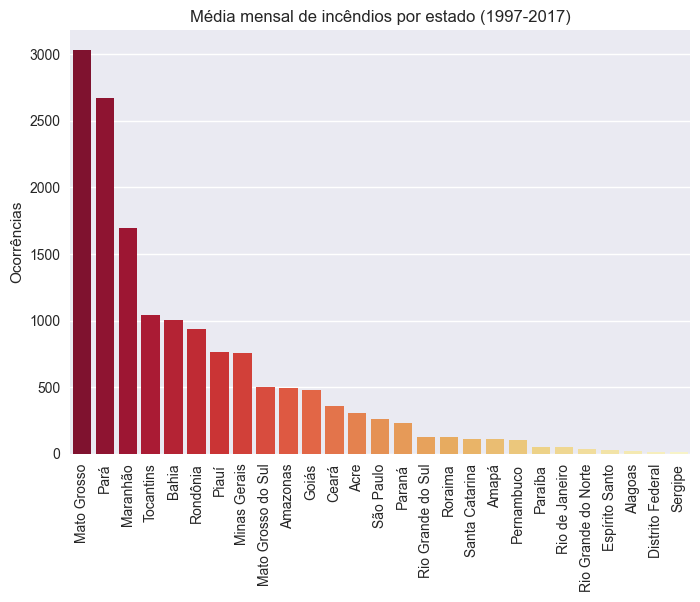

In [49]:
sns.barplot(data=medias_mais_recorrentes, x=medias_mais_recorrentes.Estado, y=medias_mais_recorrentes.Numero, palette='YlOrRd_r')

plt.xticks(rotation=90)
plt.title('Média mensal de incêndios por estado (1997-2017)')
plt.xlabel('')
plt.ylabel('Ocorrências')
plt.show()

___

## Anos onde ocorreram mais queimadas

In [50]:
anos_mais_queimadas = dados_originais.groupby('Ano').Numero.sum()
anos_mais_queimadas

Ano
1998    123881
1999    134596
2000    101528
2001    145567
2002    235792
2003    235242
2004    270384
2005    240764
2006    136890
2007    231252
2008    123249
2009    123211
2010    249274
2011    133080
2012    193791
2013    115184
2014    183660
2015    236305
2016    188295
2017    261047
Name: Numero, dtype: int64

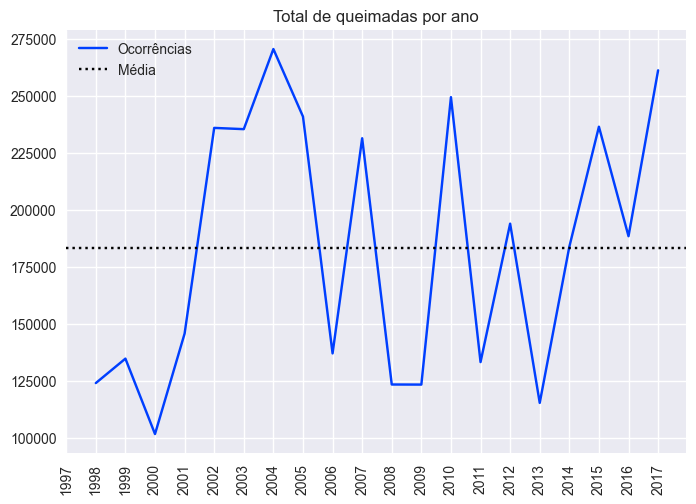

In [51]:
ax= sns.lineplot(anos_mais_queimadas, x=anos_mais_queimadas.index, y=anos_mais_queimadas, label='Ocorrências')

plt.axhline(anos_mais_queimadas.mean(), color='black', linestyle=':', label='Média')


plt.legend()
plt.xlabel('')
plt.ylabel('')
plt.xticks(range(1997,2018,1),rotation=90)
plt.title('Total de queimadas por ano')

plt.show()

Agora que fizemos alguns gráficos simples para entender nossos dados de forma geral,
vamos usar o Power BI para gerar um dashboard mais completo.

_______

# 📤 Exportando dados em formato .csv

Aqui, a partir do método **to_csv** do Pandas, exportamos nossos dados para um novo arquivo, para ser usado no PBI.

In [52]:
dados_originais.to_csv('Data/dados_corretos.csv', index=False)

_____